# Data Clean
### Takes data labels it, and breaks it into one second chunks
#### David Saffo
#### 5/16/2017

In [53]:
import pandas as pd
import itertools
import numpy as np
from io import StringIO
import glob
import math
import scipy.stats.stats as stats
import matplotlib.pyplot as plt 
%matplotlib inline

In [54]:
def createDF(sub, act, data):
    data = data.drop(4,1)
    x = 0
    i = 0
    array = []
    d = []
    for index, row in data.iterrows():
        if (data.iloc[index,0] % 5 != 0):
            array.append([data.iloc[index,1],data.iloc[index,2],data.iloc[index,3]])
        elif (data.iloc[index,0] % 5 == 0):
            d.append([sub , act, array])
            array = []
            i+=1

    d.pop(0)
    d.pop(-1)
    

    df = pd.DataFrame(d)
    
    return df

In [55]:
#find all csv files in a directory
df = pd.DataFrame()
for file in glob.glob("data/*.csv"):
    csv = pd.read_csv(file, header = None, skiprows = 2)
    file_name = file.split()
    subject = (file_name[0][5:]).lower()
    activity = (file_name[1][:-4]).lower()
    df = df.append(createDF(subject, activity, csv), ignore_index=True)
    
print(df.shape)

(566, 3)


In [56]:
df.head(5)

,0,1,2
0,chris,climbing,"[[-9.5, 0.5, -3.5], [-9.5, 0.5, -3.5], [-9.5, ..."
1,chris,climbing,"[[-8.6, -0.9, -4.6], [-8.6, -0.9, -4.6], [-8.5..."
2,chris,climbing,"[[-8.1, -2.5, -5.6], [-8.1, -2.5, -5.6], [-8.1..."
3,chris,climbing,"[[-9.9, 0.4, -0.4], [-9.9, 0.4, -0.4], [-9.9, ..."
4,chris,climbing,"[[-8.9, -1.0, -1.3], [-8.9, -1.0, -1.3], [-8.9..."


In [57]:
df['x'] = df.apply(lambda row:  [i[0] for i in row[2]], axis = 1)
df['y'] = df.apply(lambda row:  [i[1] for i in row[2]], axis = 1)
df['z'] = df.apply(lambda row:  [i[2] for i in row[2]], axis = 1)
df.head()

,0,1,2,x,y,z
0,chris,climbing,"[[-9.5, 0.5, -3.5], [-9.5, 0.5, -3.5], [-9.5, ...","[-9.5, -9.5, -9.5, -9.5, -9.3, -9.3, -9.3, -9....","[0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.5, -3.5, -3.5, -3.5, -3.4, -3.4, -3.4, -3...."
1,chris,climbing,"[[-8.6, -0.9, -4.6], [-8.6, -0.9, -4.6], [-8.5...","[-8.6, -8.6, -8.5, -8.5, -8.5, -8.5, -8.5, -8....","[-0.9, -0.9, -1.5, -1.5, -1.5, -1.5, -1.5, -0....","[-4.6, -4.6, -5.2, -5.2, -5.2, -5.2, -5.2, -5...."
2,chris,climbing,"[[-8.1, -2.5, -5.6], [-8.1, -2.5, -5.6], [-8.1...","[-8.1, -8.1, -8.1, -8.1, -8.1, -7.6, -7.6, -7....","[-2.5, -2.5, -2.5, -2.5, -2.5, -2.4, -2.4, -2....","[-5.6, -5.6, -5.6, -5.6, -5.6, -4.7, -4.7, -4...."
3,chris,climbing,"[[-9.9, 0.4, -0.4], [-9.9, 0.4, -0.4], [-9.9, ...","[-9.9, -9.9, -9.9, -9.8, -9.8, -9.8, -9.8, -9....","[0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[-0.4, -0.4, -0.4, -0.5, -0.5, -0.5, -0.5, -0...."
4,chris,climbing,"[[-8.9, -1.0, -1.3], [-8.9, -1.0, -1.3], [-8.9...","[-8.9, -8.9, -8.9, -8.9, -9.7, -9.7, -9.7, -9....","[-1.0, -1.0, -1.0, -1.0, -1.3, -1.3, -1.3, -1....","[-1.3, -1.3, -1.3, -1.3, -2.3, -2.3, -2.3, -2...."


In [58]:
df['magnitude'] = df.apply(lambda row: [math.sqrt(i[0]**2 + i[1]**2 + i[2]**2) for i in row[2]], axis = 1)

In [59]:
df['max'] = df.apply(lambda row:  max(row['magnitude']), axis = 1)

In [60]:
df['min'] = df.apply(lambda row:  min(row['magnitude']), axis = 1)

In [61]:
df['std'] = df.apply(lambda row:  np.std(row['magnitude']), axis = 1)

In [62]:
df['skew'] = df.apply(lambda row:  stats.skew(row['magnitude']), axis = 1)

In [63]:
df['kurtosis'] = df.apply(lambda row:  stats.kurtosis(row['magnitude']), axis = 1)

In [64]:
df['mean'] = df.apply(lambda row:  np.mean(row['magnitude']), axis = 1)

In [65]:
df['median'] = df.apply(lambda row:  np.median(row['magnitude']), axis = 1)

In [66]:
df['x max'] = df.apply(lambda row:  max(row['x']), axis = 1)
df['y max'] = df.apply(lambda row:  max(row['y']), axis = 1)
df['z max'] = df.apply(lambda row:  max(row['z']), axis = 1)

In [67]:
df['x min'] = df.apply(lambda row:  min(row['x']), axis = 1)
df['y min'] = df.apply(lambda row:  min(row['y']), axis = 1)
df['z min'] = df.apply(lambda row:  min(row['z']), axis = 1)

In [68]:
df['x mean'] = df.apply(lambda row:  np.mean(row['x']), axis = 1)
df['y mean'] = df.apply(lambda row:  np.mean(row['y']), axis = 1)
df['z mean'] = df.apply(lambda row:  np.mean(row['z']), axis = 1)

In [69]:
df['x median'] = df.apply(lambda row:  np.median(row['x']), axis = 1)
df['y median'] = df.apply(lambda row:  np.median(row['y']), axis = 1)
df['z median'] = df.apply(lambda row:  np.median(row['z']), axis = 1)

In [70]:
df['x skew'] = df.apply(lambda row:  stats.skew(row['x']), axis = 1)
df['y skew'] = df.apply(lambda row:  stats.skew(row['y']), axis = 1)
df['z skew'] = df.apply(lambda row:  stats.skew(row['z']), axis = 1)

In [71]:
df['x kurtosis'] = df.apply(lambda row:  stats.kurtosis(row['x']), axis = 1)
df['y kurtosis'] = df.apply(lambda row:  stats.kurtosis(row['y']), axis = 1)
df['z kurtosis'] = df.apply(lambda row:  stats.kurtosis(row['z']), axis = 1)

In [72]:
df['x std'] = df.apply(lambda row:  np.std(row['x']), axis = 1)
df['y std'] = df.apply(lambda row:  np.std(row['y']), axis = 1)
df['z std'] = df.apply(lambda row:  np.std(row['z']), axis = 1)

In [73]:
df['xy mean'] = df.apply(lambda row:  np.mean(np.array(row['x']) * np.array(row['y'])), axis = 1)
df['yz mean'] = df.apply(lambda row:  np.mean(np.array(row['y']) * np.array(row['z'])), axis = 1)
df['xz mean'] = df.apply(lambda row:  np.mean(np.array(row['x']) * np.array(row['z'])), axis = 1)

499
499


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


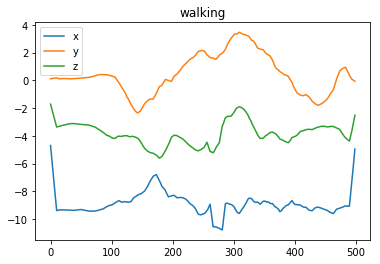

In [74]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

temp = []
tempx = []
tempy = []
tempz = []
xrun = []
yrun = []
zrun = []
for i in range(len(df)):
    temp = df.iloc[i,2]
    
    for j in range(len(temp)):
        tempx.append(temp[j][0])
        tempy.append(temp[j][1])
        tempz.append(temp[j][2])
    x = np.array(tempx)
    y = np.array(tempy)
    z = np.array(tempz)
    
    xrun.append(movingaverage(x,20))
    yrun.append(movingaverage(y,20))
    zrun.append(movingaverage(z,20))
    tempx = []
    tempy = []
    tempz = []
print(len(x))
t_sit = range(len(xrun[0]))
plt.hold('on')
plt.plot(t_sit, xrun[0], t_sit, yrun[0], t_sit, zrun[0])
plt.legend(['x', 'y', 'z'])
plt.title('walking')
plt.hold('off')

print(len(xrun[0]))
df.insert(7, "running x", xrun)
df.insert(8, "running y", yrun)
df.insert(9, "running z", zrun)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


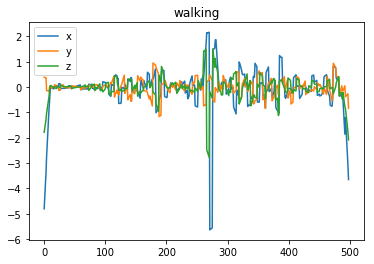

In [75]:
x = df['x'] - df['running x']
y = df['y'] - df['running y']
z = df['z'] - df['running z']

t_sit = range(len(x[0]))
plt.hold('on')
plt.plot(t_sit, x[0], t_sit, y[0], t_sit, z[0])
plt.legend(['x', 'y', 'z'])
plt.title('walking')
plt.hold('off')

df.insert(10, "x noise", x)
df.insert(11, "y noise", y)
df.insert(12, "z noise", z)

In [76]:
df['x noise min'] = df.apply(lambda row: min(row['x noise']), axis=1)
df['y noise min'] = df.apply(lambda row: min(row['y noise']), axis=1) 
df['z noise min'] = df.apply(lambda row: min(row['z noise']), axis=1) 

In [77]:
df['x noise max'] = df.apply(lambda row: max(row['x noise']), axis=1) 
df['y noise max'] = df.apply(lambda row: max(row['y noise']), axis=1) 
df['z noise max'] = df.apply(lambda row: max(row['z noise']), axis=1) 

In [78]:
df['x noise std'] = df.apply(lambda row: np.std(row['x noise']), axis=1) 
df['y noise std'] = df.apply(lambda row: np.std(row['y noise']), axis=1) 
df['z noise std'] = df.apply(lambda row: np.std(row['z noise']), axis=1) 

In [79]:
# FFT signal on X, Y, and Z axis

def fft_positive(fft):
    half = math.floor(len(fft)/2)
    return fft[1:half]

x_fft = df.apply(lambda row: [i for i in fft_positive(abs(np.fft.fft(row['x'])))], axis = 1)
y_fft = df.apply(lambda row: [i for i in fft_positive(abs(np.fft.fft(row['y'])))], axis = 1)
z_fft = df.apply(lambda row: [i for i in fft_positive(abs(np.fft.fft(row['z'])))], axis = 1)

df.insert(13, 'x fft', x_fft)
df.insert(14, 'y fft', y_fft)
df.insert(15, 'z fft', z_fft)

df.head()


,0,1,2,x,y,z,magnitude,running x,running y,running z,...,xz mean,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,chris,climbing,"[[-9.5, 0.5, -3.5], [-9.5, 0.5, -3.5], [-9.5, ...","[-9.5, -9.5, -9.5, -9.5, -9.3, -9.3, -9.3, -9....","[0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.5, -3.5, -3.5, -3.5, -3.4, -3.4, -3.4, -3....","[10.136567466356647, 10.136567466356647, 10.13...","[-4.695, -5.165, -5.635, -6.105, -6.575, -7.04...","[0.11, 0.12, 0.13, 0.135, 0.14, 0.145, 0.15, 0...","[-1.715, -1.88, -2.045, -2.21, -2.375, -2.54, ...",...,34.639218,-5.640,-1.165,-2.775,2.165,0.950,1.515,0.899810,0.316651,0.467822
1,chris,climbing,"[[-8.6, -0.9, -4.6], [-8.6, -0.9, -4.6], [-8.5...","[-8.6, -8.6, -8.5, -8.5, -8.5, -8.5, -8.5, -8....","[-0.9, -0.9, -1.5, -1.5, -1.5, -1.5, -1.5, -0....","[-4.6, -4.6, -5.2, -5.2, -5.2, -5.2, -5.2, -5....","[9.79438614717635, 9.79438614717635, 10.076705...","[-4.29, -4.725, -5.16, -5.585, -6.01, -6.435, ...","[-0.525, -0.545, -0.565, -0.565, -0.565, -0.56...","[-2.54, -2.8, -3.06, -3.325, -3.59, -3.855, -4...",...,40.291884,-4.310,-4.110,-2.700,1.750,2.300,1.370,0.669724,0.665580,0.548733
2,chris,climbing,"[[-8.1, -2.5, -5.6], [-8.1, -2.5, -5.6], [-8.1...","[-8.1, -8.1, -8.1, -8.1, -8.1, -7.6, -7.6, -7....","[-2.5, -2.5, -2.5, -2.5, -2.5, -2.4, -2.4, -2....","[-5.6, -5.6, -5.6, -5.6, -5.6, -4.7, -4.7, -4....","[10.159724405711014, 10.159724405711014, 10.15...","[-3.925, -4.315, -4.705, -5.095, -5.485, -5.87...","[-1.225, -1.39, -1.555, -1.72, -1.885, -2.05, ...","[-2.575, -2.82, -3.065, -3.31, -3.555, -3.8, -...",...,28.665170,-4.735,-3.490,-3.260,3.395,4.995,1.950,0.895907,0.788339,0.571532
3,chris,climbing,"[[-9.9, 0.4, -0.4], [-9.9, 0.4, -0.4], [-9.9, ...","[-9.9, -9.9, -9.9, -9.8, -9.8, -9.8, -9.8, -9....","[0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[-0.4, -0.4, -0.4, -0.5, -0.5, -0.5, -0.5, -0....","[9.916148445843275, 9.916148445843275, 9.91614...","[-4.915, -5.405, -5.895, -6.385, -6.88, -7.375...","[0.235, 0.26, 0.285, 0.31, 0.335, 0.36, 0.385,...","[-0.235, -0.26, -0.285, -0.31, -0.325, -0.34, ...",...,9.540701,-4.985,-2.335,-0.775,0.870,1.315,0.960,0.644040,0.393794,0.234258
4,chris,climbing,"[[-8.9, -1.0, -1.3], [-8.9, -1.0, -1.3], [-8.9...","[-8.9, -8.9, -8.9, -8.9, -9.7, -9.7, -9.7, -9....","[-1.0, -1.0, -1.0, -1.0, -1.3, -1.3, -1.3, -1....","[-1.3, -1.3, -1.3, -1.3, -2.3, -2.3, -2.3, -2....","[9.049861877399014, 9.049861877399014, 9.04986...","[-4.69, -5.175, -5.66, -6.145, -6.62, -7.095, ...","[-0.575, -0.625, -0.675, -0.725, -0.725, -0.72...","[-0.93, -1.025, -1.12, -1.215, -1.305, -1.395,...",...,35.131263,-4.210,-2.685,-2.005,1.335,2.340,1.200,0.712566,0.658588,0.408498


In [80]:
df['x fft min'] = df.apply(lambda row: min(row['x fft']), axis = 1)
df['y fft min'] = df.apply(lambda row: min(row['y fft']), axis = 1)
df['z fft min'] = df.apply(lambda row: min(row['z fft']), axis = 1)

In [81]:
df['x fft max'] = df.apply(lambda row: max(row['x fft']), axis = 1)
df['y fft max'] = df.apply(lambda row: max(row['y fft']), axis = 1)
df['z fft max'] = df.apply(lambda row: max(row['z fft']), axis = 1)

In [82]:
df['x fft std'] = df.apply(lambda row: np.std(row['x fft']), axis = 1)
df['y fft std'] = df.apply(lambda row: np.std(row['y fft']), axis = 1)
df['z fft std'] = df.apply(lambda row: np.std(row['z fft']), axis = 1)

In [83]:
df['x fft mean'] = df.apply(lambda row: np.mean(row['x fft']), axis = 1)
df['y fft mean'] = df.apply(lambda row: np.mean(row['y fft']), axis = 1)
df['z fft mean'] = df.apply(lambda row: np.mean(row['z fft']), axis = 1)

In [84]:
df['x fft median'] = df.apply(lambda row: np.median(row['x fft']), axis = 1)
df['y fft median'] = df.apply(lambda row: np.median(row['y fft']), axis = 1)
df['z fft median'] = df.apply(lambda row: np.median(row['z fft']), axis = 1)

In [85]:
def weighted_fft_mean(signal):
    fft = abs(np.fft.fft(signal))
    t = np.arange(len(signal))
    fft_freq = np.fft.fftfreq(t.shape[-1])
    
    half = math.floor(len(fft)/2)    
    fft = fft[1:half]
    fft_freq = fft_freq[1:half]
    
    mean = np.sum(fft * fft_freq) / sum(fft_freq)
    
    return mean

print(weighted_fft_mean(df.iloc[0]['x']))

df['x fft mean weighted'] = df.apply(lambda row: weighted_fft_mean(row['x']), axis = 1)
df['y fft mean weighted'] = df.apply(lambda row: weighted_fft_mean(row['y']), axis = 1)
df['z fft mean weighted'] = df.apply(lambda row: weighted_fft_mean(row['z']), axis = 1)




7.99570838701


In [86]:
def fft_bin(axis,signal,bins):   
    bin_size = math.floor(len(signal)/bins)

    fft_features = [axis + ' fft bin ' + str(i+1) for i in range(bins)]    
#     fft_bins_mean = pd.DataFrame(index=[0], columns=fft_features)
    
    fft_bins = [signal[i:i + bin_size] for i in range(0, len(signal), bin_size)]
    fft_bins_mean = [np.mean(fft_bins[i]) for i in range(bins)]
    
#     for i in range(0,bins):
#         bin_mean_curr = np.mean(fft_bins[i]) 
#         fft_bins_mean.set_value(0, fft_features[i], bin_mean_curr)        
    
    return dict(zip(fft_features, fft_bins_mean))

# print (fft_bin('x',df.iloc[0]['x fft'],10))

df = df.merge(df.x.apply(lambda row: pd.Series(fft_bin('x',row,10))), left_index=True, right_index=True)
df = df.merge(df.y.apply(lambda row: pd.Series(fft_bin('y',row,10))), left_index=True, right_index=True)
df = df.merge(df.z.apply(lambda row: pd.Series(fft_bin('z',row,10))), left_index=True, right_index=True)

df.head()
       

,0,1,2,x,y,z,magnitude,running x,running y,running z,...,z fft bin 1,z fft bin 10,z fft bin 2,z fft bin 3,z fft bin 4,z fft bin 5,z fft bin 6,z fft bin 7,z fft bin 8,z fft bin 9
0,chris,climbing,"[[-9.5, 0.5, -3.5], [-9.5, 0.5, -3.5], [-9.5, ...","[-9.5, -9.5, -9.5, -9.5, -9.3, -9.3, -9.3, -9....","[0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.5, -3.5, -3.5, -3.5, -3.4, -3.4, -3.4, -3....","[10.136567466356647, 10.136567466356647, 10.13...","[-4.695, -5.165, -5.635, -6.105, -6.575, -7.04...","[0.11, 0.12, 0.13, 0.135, 0.14, 0.145, 0.15, 0...","[-1.715, -1.88, -2.045, -2.21, -2.375, -2.54, ...",...,-3.232653,-3.589796,-3.493878,-4.061224,-5.138776,-4.463265,-4.224490,-2.646939,-4.108163,-3.681633
1,chris,climbing,"[[-8.6, -0.9, -4.6], [-8.6, -0.9, -4.6], [-8.5...","[-8.6, -8.6, -8.5, -8.5, -8.5, -8.5, -8.5, -8....","[-0.9, -0.9, -1.5, -1.5, -1.5, -1.5, -1.5, -0....","[-4.6, -4.6, -5.2, -5.2, -5.2, -5.2, -5.2, -5....","[9.79438614717635, 9.79438614717635, 10.076705...","[-4.29, -4.725, -5.16, -5.585, -6.01, -6.435, ...","[-0.525, -0.545, -0.565, -0.565, -0.565, -0.56...","[-2.54, -2.8, -3.06, -3.325, -3.59, -3.855, -4...",...,-6.544898,-4.797959,-8.657143,-7.426531,-9.861224,-8.867347,-7.914286,-6.471429,-4.300000,-4.553061
2,chris,climbing,"[[-8.1, -2.5, -5.6], [-8.1, -2.5, -5.6], [-8.1...","[-8.1, -8.1, -8.1, -8.1, -8.1, -7.6, -7.6, -7....","[-2.5, -2.5, -2.5, -2.5, -2.5, -2.4, -2.4, -2....","[-5.6, -5.6, -5.6, -5.6, -5.6, -4.7, -4.7, -4....","[10.159724405711014, 10.159724405711014, 10.15...","[-3.925, -4.315, -4.705, -5.095, -5.485, -5.87...","[-1.225, -1.39, -1.555, -1.72, -1.885, -2.05, ...","[-2.575, -2.82, -3.065, -3.31, -3.555, -3.8, -...",...,-4.334694,-0.479592,-5.991837,-6.261224,-7.177551,-6.502041,-3.738776,-1.197959,-1.061224,-0.555102
3,chris,climbing,"[[-9.9, 0.4, -0.4], [-9.9, 0.4, -0.4], [-9.9, ...","[-9.9, -9.9, -9.9, -9.8, -9.8, -9.8, -9.8, -9....","[0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, ...","[-0.4, -0.4, -0.4, -0.5, -0.5, -0.5, -0.5, -0....","[9.916148445843275, 9.916148445843275, 9.91614...","[-4.915, -5.405, -5.895, -6.385, -6.88, -7.375...","[0.235, 0.26, 0.285, 0.31, 0.335, 0.36, 0.385,...","[-0.235, -0.26, -0.285, -0.31, -0.325, -0.34, ...",...,-0.457143,-1.720408,-0.416327,-0.355102,-0.493878,-1.340816,-1.683673,-1.224490,-0.889796,-1.385714
4,chris,climbing,"[[-8.9, -1.0, -1.3], [-8.9, -1.0, -1.3], [-8.9...","[-8.9, -8.9, -8.9, -8.9, -9.7, -9.7, -9.7, -9....","[-1.0, -1.0, -1.0, -1.0, -1.3, -1.3, -1.3, -1....","[-1.3, -1.3, -1.3, -1.3, -2.3, -2.3, -2.3, -2....","[9.049861877399014, 9.049861877399014, 9.04986...","[-4.69, -5.175, -5.66, -6.145, -6.62, -7.095, ...","[-0.575, -0.625, -0.675, -0.725, -0.725, -0.72...","[-0.93, -1.025, -1.12, -1.215, -1.305, -1.395,...",...,-1.959184,-4.144898,-2.997959,-4.204082,-2.940816,-4.955102,-6.606122,-7.785714,-8.532653,-5.969388


In [89]:
print(df.shape)

(566, 104)


In [87]:
df.head(1)

,0,1,2,x,y,z,magnitude,running x,running y,running z,...,z fft bin 1,z fft bin 10,z fft bin 2,z fft bin 3,z fft bin 4,z fft bin 5,z fft bin 6,z fft bin 7,z fft bin 8,z fft bin 9
0,chris,climbing,"[[-9.5, 0.5, -3.5], [-9.5, 0.5, -3.5], [-9.5, ...","[-9.5, -9.5, -9.5, -9.5, -9.3, -9.3, -9.3, -9....","[0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.5, -3.5, -3.5, -3.5, -3.4, -3.4, -3.4, -3....","[10.136567466356647, 10.136567466356647, 10.13...","[-4.695, -5.165, -5.635, -6.105, -6.575, -7.04...","[0.11, 0.12, 0.13, 0.135, 0.14, 0.145, 0.15, 0...","[-1.715, -1.88, -2.045, -2.21, -2.375, -2.54, ...",...,-3.232653,-3.589796,-3.493878,-4.061224,-5.138776,-4.463265,-4.22449,-2.646939,-4.108163,-3.681633


In [88]:
df.to_csv('SimTodActData.csv')